# **KNN** #

**Classification**

**Imports**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

**Loading Dataset**

In [3]:
df = pd.read_csv("../Datasets/Bank Customer Churn Prediction.csv")

df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Dropping Unnecessary columns** 

In [4]:
#Dropping customer_id as it doesnt have any effect on results 
df = df.drop("customer_id", axis=1)

In [5]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Handling Categorical Variables**

We will convert the gender into Binary using Label Encoder

In [6]:
#converting the value of column to 0 or 1
from sklearn.preprocessing import LabelEncoder

variables = ['gender']

encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

We will convert the country into Nominal variable using OneHotEncoder

In [7]:
from sklearn.preprocessing import OneHotEncoder

variables = ['country']

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [8]:
df = df.drop("country_France", axis=1)
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


**Balancing Dataset**

we will balance the dataset to overcome the imbalance of minority class

In [9]:

from imblearn.over_sampling import SMOTE

X = df.drop('churn', axis=1)
y = df['churn']

smote = SMOTE(sampling_strategy=0.5, random_state=42)  
X_res, y_res = smote.fit_resample(X, y)




**Train/Test Split**

In [10]:
#Defining the dataset into X & Y 

X = df.drop(["churn"], axis=1)
y = df[["churn"]]

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=24,
stratify=y_res)


**Determine the optimal k-value**

Based on iterations, best k-value is this:
40


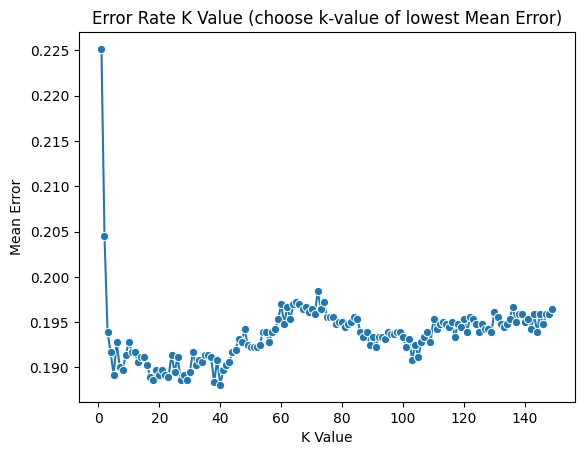

In [ ]:
# this is a KNN-specific part, we have to search for the optimal
# k-value in our data
# NOTE: this part is a bit different depending on whether doing regression or classification

###################################

# CLASSIFIER VERSION
# adjust this to 50 or even 150 if you have lots of data rows
max_iterations = 50

# list to save the error values in the loop
error = []

# the default metric in scikit-learn
metric_selection = "cosine"
weight_selection = 'uniform'

# Calculating error for K values between 1 and 40
for i in range(1, max_iterations):

     # try with current k-value, train the model and make a test prediction
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i, weights=weight_selection, metric=metric_selection))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)

    # save the error value for this k-value
    error.append(np.mean(pred_i != y_test))
    
# plot all the k-values and their error values
sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
plt.title('Error Rate K Value (choose k-value of lowest Mean Error)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
print("Based on iterations, best k-value is this:")
k_value = np.argmin(error) + 1
print(k_value)

**KNN Model**

In [12]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k_value, metric=metric_selection))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='cosine', n_neighbors=40))])

**Metrics**

In [13]:
#making test predictions 
predictions = model.predict(X_test)

# printing the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# getting overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2389
           1       0.79      0.60      0.68      1195

    accuracy                           0.81      3584
   macro avg       0.80      0.76      0.77      3584
weighted avg       0.81      0.81      0.80      3584


Model overall accuracy: 81.19%


The metrics show 81 percent accuracy which is same as SVC but Random Forests outperforms all other models. KNNs are more precise in minority class compared to SVC and logistic regression. 

[[2197  192]
 [ 482  713]]


<Axes: >

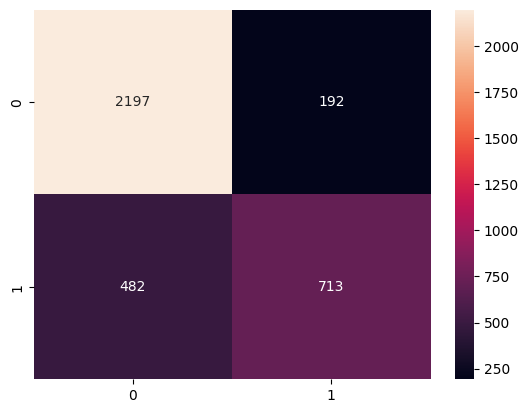

In [14]:
print(confusion_matrix(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [15]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


0.8685122361731156

ROC AUC score of 0.86 shows that its performing good than some previous models but less than Random Forests..

In [16]:
# Gender -column: 0 => Female, 1 => Male
tester_row = {
    'credit_score': 771,
    'gender': 1,
    'age': 39,
    'tenure': 5,
    'balance': 0.0,
    'products_number': 2,
    'credit_card': 1,
    'active_member': 0,
    'estimated_salary': 96270.64,
    'country_Germany':0,
    'country_Spain':0

}

# creating a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
print("All probabilities by category:")
print(model.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Did this person churn (No/Yes):")
result = labels[model.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[1. 0.]]

Did this person churn (No/Yes):
No
-------------------


In [17]:
# Gender -column: 0 => Female, 1 => Male
tester_row = {
    'credit_score': 772,
    'gender': 1,
    'age': 60,
    'tenure': 3,
    'balance': 75075.31,
    'products_number': 4,
    'credit_card': 1,
    'active_member': 0,
    'estimated_salary': 92888.52,
    'country_Germany':1,
    'country_Spain':0

}

# creating a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
print("All probabilities by category:")
print(model.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Did this person churn (No/Yes):")
result = labels[model.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[0. 1.]]

Did this person churn (No/Yes):
Yes
-------------------


In application model is predicting with great accuracy

**Summary**

We have imported all the libraries first then we imported the data and dropped irrelevant coloumn after that we converted non numerical variables such as gender and country as numerical values using LabelEncoder and OneHotEncoder. We balanced the dataset using SMOTE (Synthetic oversampling of minority class) and found optimal K-value and  trained the model and checked metrics with previous model to compare and there was improvement in the accuracy. ROC AUC for the model showed 86 which is good than some previous models but not as good as Random Forests.